# 正交匹配追踪算法

## 简单的例子

In [22]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
reg = OrthogonalMatchingPursuit().fit(X, y)
reg.score(X, y)
reg.predict(X[:1,])

array([-78.38545074])

## OMP和真实值的对比

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

In [24]:
n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)

idx, = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

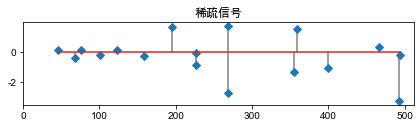

In [25]:
# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("稀疏信号")
plt.stem(idx, w[idx], linefmt='grey', markerfmt='D', use_line_collection=True)
plt.show()

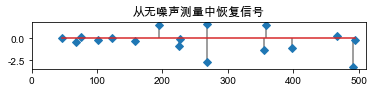

In [26]:
# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()

plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("从无噪声测量中恢复信号")
plt.stem(idx_r, coef[idx_r],linefmt='grey', markerfmt='D',  use_line_collection=True)

plt.show()

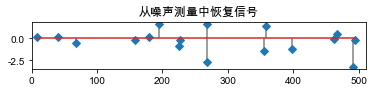

In [27]:
# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("从噪声测量中恢复信号")
plt.stem(idx_r, coef[idx_r],linefmt='grey', markerfmt='D',  use_line_collection=True)
plt.show()

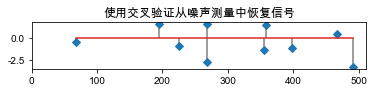

In [28]:
# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("使用交叉验证从噪声测量中恢复信号")
plt.stem(idx_r, coef[idx_r],linefmt='grey', markerfmt='D',  use_line_collection=True)
plt.show()

